<a href="https://colab.research.google.com/github/Aakash-legend/TSC/blob/main/TSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("viditgandhi/tree-species-identification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tree-species-identification-dataset


In [7]:
import shutil

# Define the source path (where the dataset is downloaded)
source_path = '/kaggle/input/tree-species-identification-dataset'

# Define the destination path (replace with your desired path)
destination_path = '/content/tree-species-dataset'

# Use shutil.copytree() to copy the directory
try:
    shutil.copytree(source_path, destination_path)
    print(f"Dataset copied successfully from {source_path} to {destination_path}")
except shutil.Error as e:
    print(f"Error copying dataset: {e}")
except FileNotFoundError:
    print(f"Source directory not found: {source_path}")
except FileExistsError:
    print(f"Destination directory already exists: {destination_path}")

Dataset copied successfully from /kaggle/input/tree-species-identification-dataset to /content/tree-species-dataset


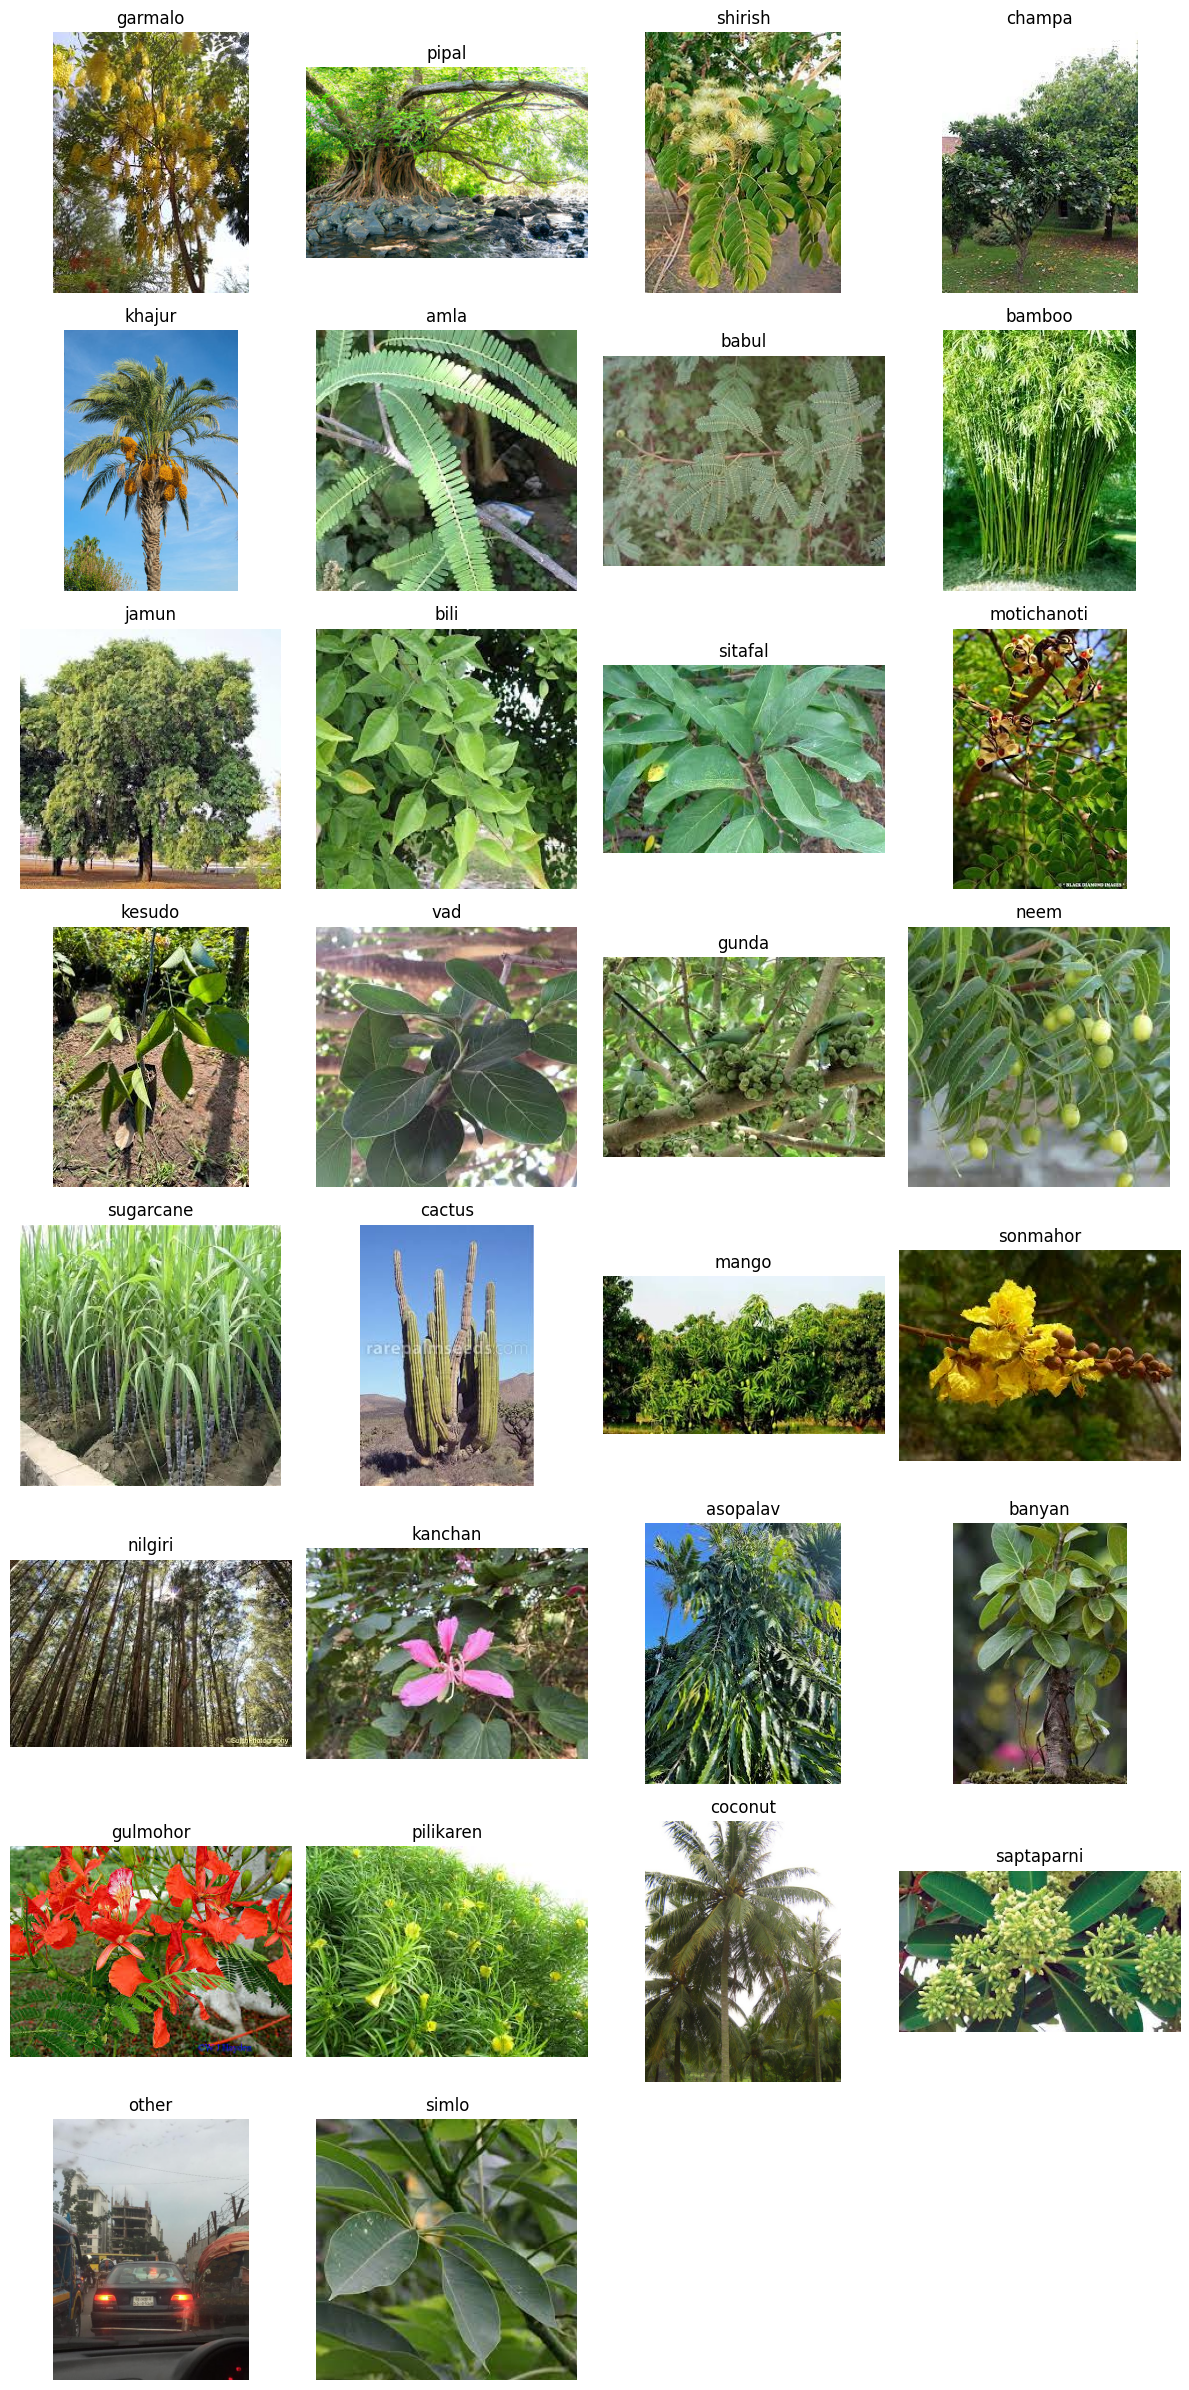

In [12]:
import os
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = '/content/tree-species-dataset/Tree_Species_Dataset'
species_folders = [f.name for f in os.scandir(dataset_path) if f.is_dir()]
n_species = len(species_folders)
n_cols = 4
n_rows = (n_species + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
axes = axes.flatten()

for i, species_folder in enumerate(species_folders):
    folder_path = os.path.join(dataset_path, species_folder)
    image_files = [f.name for f in os.scandir(folder_path) if f.is_file() and f.name.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:
        image_path = os.path.join(folder_path, image_files[0])
        try:
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(species_folder)
            axes[i].axis('off') # Hide axes
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            axes[i].set_title(f"Error: {species_folder}")
            axes[i].axis('off')
    else:
        axes[i].set_title(f"No image: {species_folder}")
        axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [13]:
image_counts = {}
for species_folder in species_folders:
    folder_path = os.path.join(dataset_path, species_folder)
    image_files = [f.name for f in os.scandir(folder_path) if f.is_file() and f.name.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[species_folder] = len(image_files)

print("Number of images in each species folder:")
for folder, count in image_counts.items():
    print(f"{folder}: {count}")


Number of images in each species folder:
garmalo: 50
pipal: 50
shirish: 50
champa: 50
khajur: 50
amla: 50
babul: 50
bamboo: 50
jamun: 50
bili: 50
sitafal: 50
motichanoti: 50
kesudo: 50
vad: 50
gunda: 50
neem: 50
sugarcane: 50
cactus: 50
mango: 50
sonmahor: 50
nilgiri: 50
kanchan: 50
asopalav: 50
banyan: 50
gulmohor: 50
pilikaren: 50
coconut: 50
saptaparni: 50
other: 150
simlo: 50


In [11]:
def remove_git_dir(directory):
    git_path = os.path.join(directory, '.git')
    if os.path.exists(git_path):
        print(f"Removing .git directory from {directory}")
        try:
            shutil.rmtree(git_path)
            print(f"Successfully removed {git_path}")
        except Exception as e:
            print(f"Error removing {git_path}: {e}")

remove_git_dir("/content/tree-species-dataset/Tree_Species_Dataset")


Removing .git directory from /content/tree-species-dataset/Tree_Species_Dataset
Successfully removed /content/tree-species-dataset/Tree_Species_Dataset/.git
